In [ ]:

import numpy
import pandas
import seaborn
import matplotlib.pyplot
%matplotlib inline

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [ ]:
rawData = pandas.read_csv('/content/sample_data/Heart_Disease_Prediction.csv')

In [ ]:
rawData.sample(5)

,Age,Sex,Chestpaintype,BP,Cholesterol,FBSover120,EKGresults,MaxHR,Exerciseangina,STdepression,SlopeofST,Numberofvesselsfluro,Thallium,HeartD
202,60,1,4,125,258,0,2,141,1,2.8,2,1,7,Presence
185,43,1,3,130,315,0,0,162,0,1.9,1,1,3,Absence
207,58,1,3,105,240,0,2,154,1,0.6,2,0,7,Absence
219,44,1,2,120,220,0,0,170,0,0.0,1,0,3,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence


In [ ]:

rawData.shape

(270, 14)

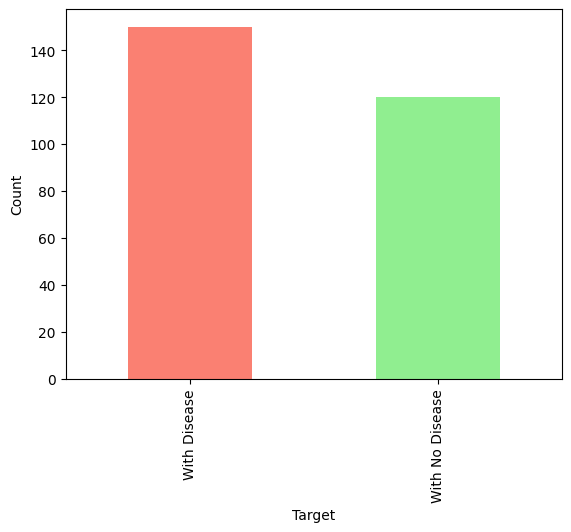

In [ ]:
plt1 = rawData['HeartD'].value_counts().plot(kind='bar',color=['salmon','lightgreen'],xlabel='Target')
plt1.set_ylabel('Count')
plt1.set_xticklabels(('With Disease','With No Disease'));


In [ ]:
rawData.isna().value_counts()

Age    Sex    Chestpaintype  BP     Cholesterol  FBSover120  EKGresults  MaxHR  Exerciseangina  STdepression  SlopeofST  Numberofvesselsfluro  Thallium  HeartD
False  False  False          False  False        False       False       False  False           False         False      False                 False     False     270
dtype: int64

Text(0, 0.5, 'Count')

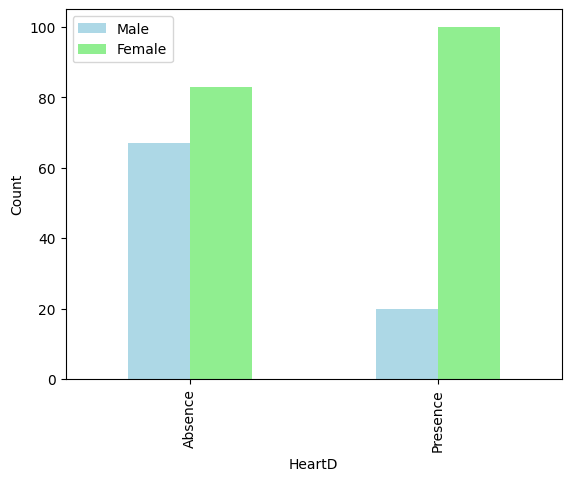

In [ ]:
plt2 = pandas.crosstab( rawData.HeartD, rawData.Sex).plot(kind='bar',color=['lightblue','lightgreen'])
plt2.legend(['Male','Female'])
plt2.set_ylabel('Count')

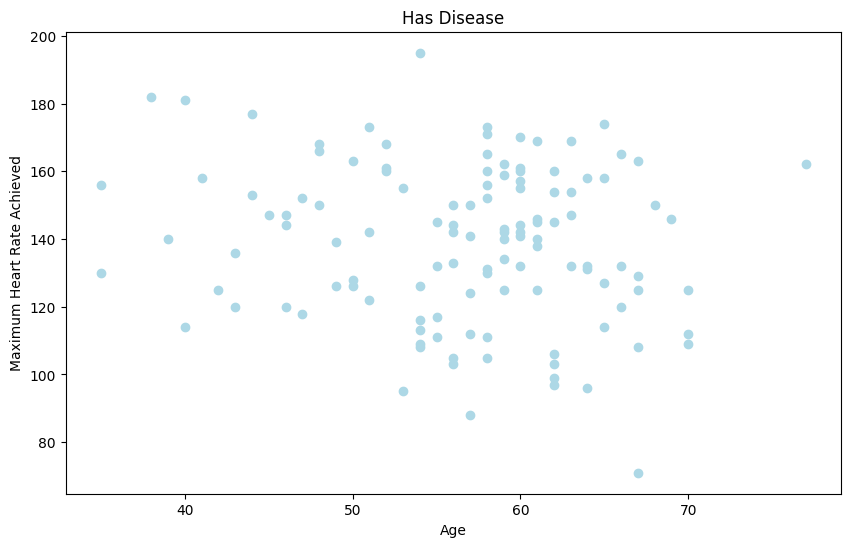

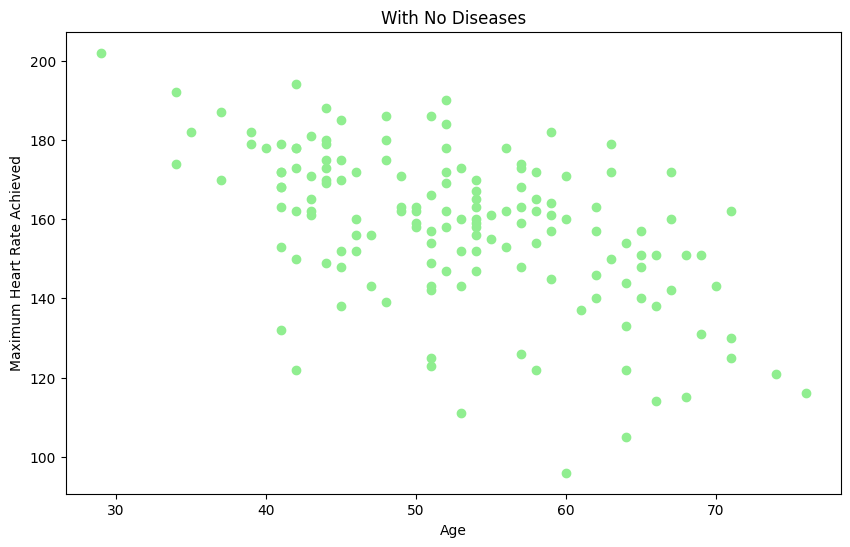

In [ ]:
matplotlib.pyplot.figure(figsize=(10,6))

matplotlib.pyplot.scatter(rawData.Age[rawData.HeartD=="Presence"],rawData.MaxHR[rawData.HeartD=="Presence"],color='lightblue')
matplotlib.pyplot.ylabel('Maximum Heart Rate Achieved')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.title('Has Disease')
matplotlib.pyplot.show()

matplotlib.pyplot.figure(figsize=(10,6))

matplotlib.pyplot.scatter(rawData.Age[rawData.HeartD=="Absence"],rawData.MaxHR[rawData.HeartD=="Absence"],color='lightgreen')
matplotlib.pyplot.ylabel('Maximum Heart Rate Achieved')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.title('With No Diseases')
matplotlib.pyplot.show()

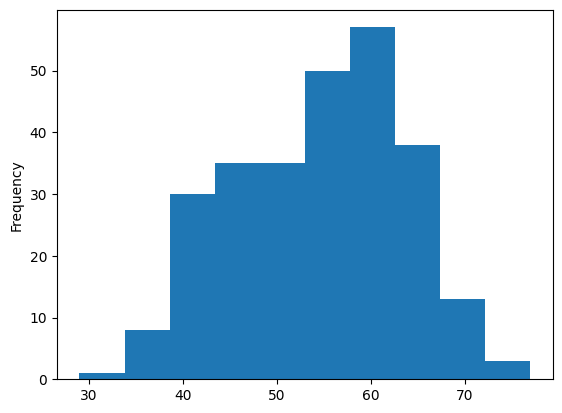

In [ ]:
rawData.Age.plot.hist();

Text(0.5, 0, 'Chest Pain Type')

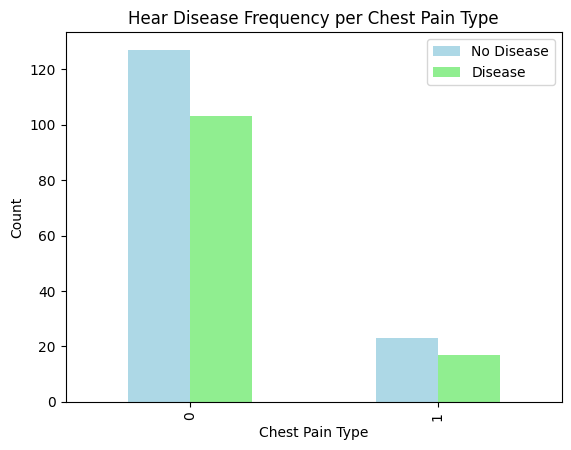

In [ ]:

plt3 = pandas.crosstab(rawData.FBSover120,rawData.HeartD).plot(kind='bar',color=['lightblue','lightgreen'])
plt3.set_title('Hear Disease Frequency per Chest Pain Type')
plt3.legend(['No Disease','Disease'])
plt3.set_ylabel('Count')
plt3.set_xlabel('Chest Pain Type')

<ipython-input-24-ab008164e85d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = rawData.corr()


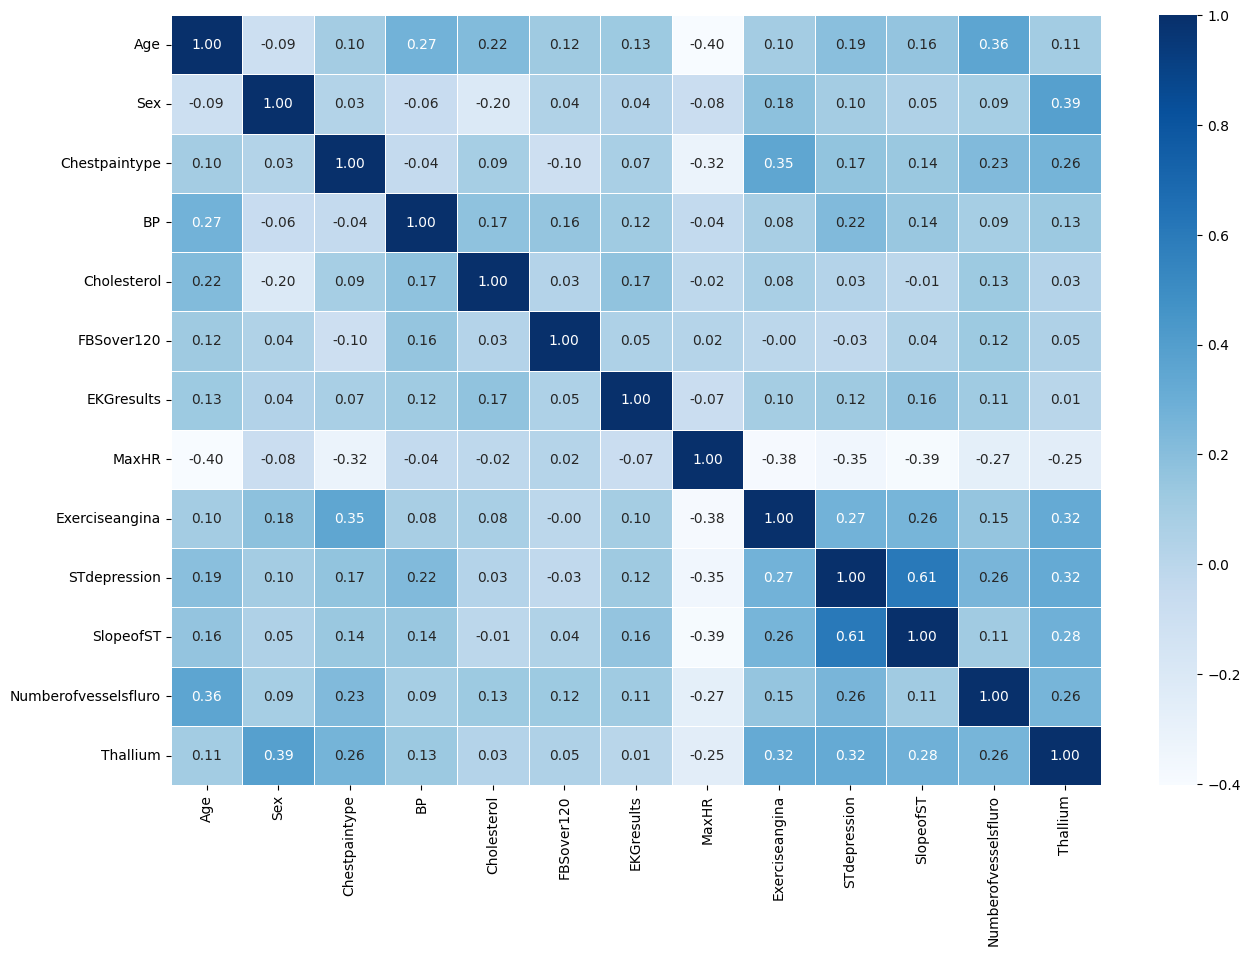

In [ ]:
corrMatrix = rawData.corr()

fig,ax = matplotlib.pyplot.subplots(figsize=(15,10))
ax = seaborn.heatmap(corrMatrix
                     ,annot=True
                     ,linewidths=0.5
                     ,fmt=".2f"
                     ,cmap="Blues"
                    )

In [ ]:

X = rawData.drop('HeartD',axis=1)
y = rawData['HeartD']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
models = {'LogisticReg':LogisticRegression()
          ,'KNN': KNeighborsClassifier()
          ,"Random Forest": RandomForestClassifier()
         }

In [ ]:
def evaluate(models,xtrain,xtest,ytrain,ytest):
  modelScores = {}
  for name,model in models.items():
      model.fit(xtrain,ytrain)
      modelScores[name] = model.score(xtest,ytest)
  return modelScores

In [ ]:
mdlcmprsn = evaluate(models,xtrain,xtest,ytrain,ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


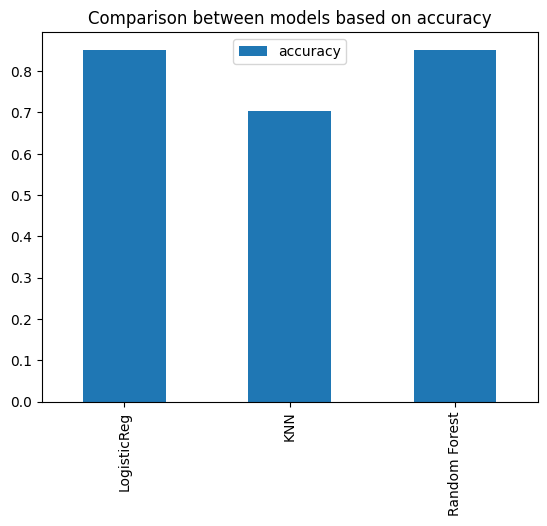

In [ ]:
pandas.DataFrame(mdlcmprsn,index=['accuracy']).T.plot.bar()
matplotlib.pyplot.title('Comparison between models based on accuracy');

In [ ]:
trainScores = []
testScores = []
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainScores.append(knn.score(xtrain,ytrain))
    testScores.append(knn.score(xtest,ytest))


The highest score KNN could achieve within the range of 1 to 21 was 74.07


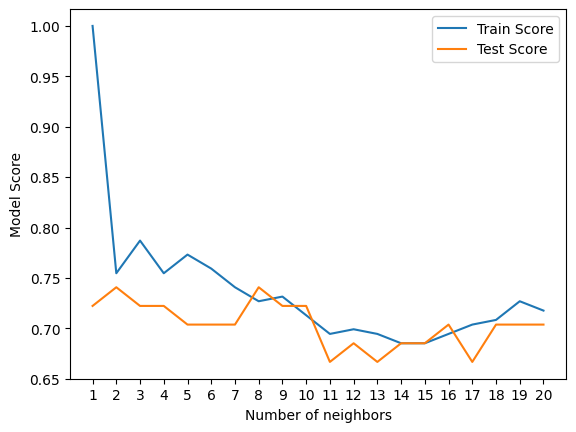

In [ ]:
matplotlib.pyplot.plot(neighbors,trainScores,label='Train Score')
matplotlib.pyplot.plot(neighbors,testScores,label='Test Score')
matplotlib.pyplot.legend()
matplotlib.pyplot.xticks(numpy.arange(1,21))
matplotlib.pyplot.xlabel("Number of neighbors")
matplotlib.pyplot.ylabel("Model Score")
print(f'The highest score KNN could achieve within the range of 1 to 21 was {max(testScores)*100:.2f}')

In [ ]:
logRegGrid = {
          "C": numpy.logspace(-4,4,20)
         ,"solver": ['liblinear']
         }
rfGrids = {
           "n_estimators": numpy.arange(10,1000,50)
          ,"max_depth": [None,3,5,10]
          ,"min_samples_split":numpy.arange(2,20,2)
          ,"min_samples_leaf": numpy.arange(1,20,2)
          }

In [ ]:
rsLogReg = RandomizedSearchCV(LogisticRegression()
                             ,param_distributions=logRegGrid
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
rsLogReg.fit(xtrain,ytrain)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rsLogReg.score(xtest,ytest)

0.8333333333333334

In [ ]:
rsRF = RandomizedSearchCV(RandomForestClassifier()
                             ,param_distributions=rfGrids
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
rsRF.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rsRF.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': None}

In [ ]:
rsRF.score(xtest,ytest)

0.7592592592592593

In [ ]:
logRegGrid = {
          "C": numpy.logspace(-4,4,30)
         ,"solver": ['liblinear']
         }
gsLogReg = GridSearchCV(
     LogisticRegression()
    ,param_grid=logRegGrid
    ,cv=5
    ,verbose=True
)
gsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gsLogReg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gsLogReg.score(xtest,ytest)

0.8518518518518519

In [ ]:
yPred = gsLogReg.predict(xtest)

In [ ]:
confusion_matrix(ytest,yPred)

array([[29,  2],
       [ 6, 17]])

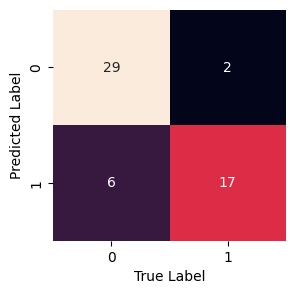

In [ ]:
fig,ax = matplotlib.pyplot.subplots(figsize=(3,3))
ax = seaborn.heatmap(
     confusion_matrix(ytest,yPred)
    ,annot=True
    ,cbar=False
)

matplotlib.pyplot.xlabel('True Label')
matplotlib.pyplot.ylabel('Predicted Label');

In [ ]:
print(classification_report(ytest,yPred))

              precision    recall  f1-score   support

     Absence       0.83      0.94      0.88        31
    Presence       0.89      0.74      0.81        23

    accuracy                           0.85        54
   macro avg       0.86      0.84      0.84        54
weighted avg       0.86      0.85      0.85        54



In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.83333333, 0.85185185, 0.83333333, 0.85185185, 0.7962963 ])

In [ ]:
cvA = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy',verbose=False))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='precision')

In [ ]:


cvP = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='precision'))

In [ ]:

cross_val_score(gsLogReg,X,y,cv=5,scoring='recall')

In [ ]:

cvR = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='recall'))

In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='f1')

In [ ]:
cvF1 = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='f1'))

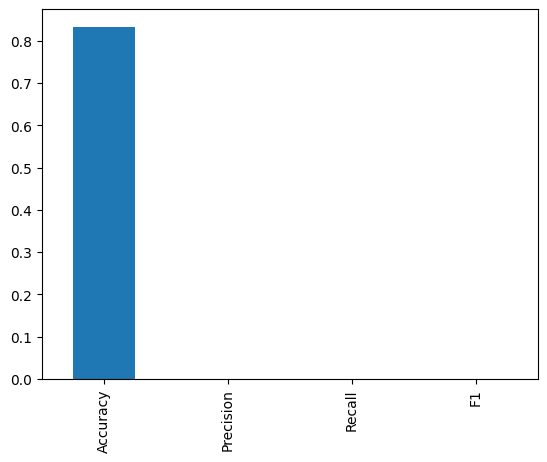

In [ ]:
cvMetrics = pandas.DataFrame({
     "Accuracy": cvA
    ,"Precision": cvP
    ,"Recall": cvR
    ,"F1": cvF1
            },index=[0])
cvMetrics.T.plot.bar(legend=False);

In [ ]:
gsLogReg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(
    C=0.1082636733874054
    ,solver='liblinear')
clf.fit(xtrain,ytrain)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [ ]:
feature = dict(zip(rawData.columns,list(clf.coef_[0])))

In [ ]:
feature

{'Age': -0.034592696809982997,
 'Sex': 0.3661014584790868,
 'Chestpaintype': 0.389588626452238,
 'BP': 0.012016540283698326,
 'Cholesterol': 0.004129634597714139,
 'FBSover120': -0.12950267092769466,
 'EKGresults': 0.2892275750500963,
 'MaxHR': -0.03411804806842162,
 'Exerciseangina': 0.3131224087899185,
 'STdepression': 0.3525745467049933,
 'SlopeofST': 0.035887121356681866,
 'Numberofvesselsfluro': 0.8022471037578305,
 'Thallium': 0.31377463239601516}

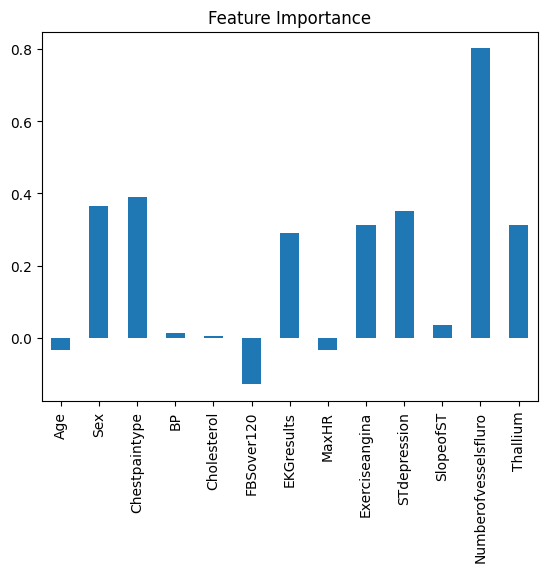

In [ ]:
pandas.DataFrame(feature,index=[0]).T.plot.bar(title="Feature Importance",legend=False);